# Pandas: Advanced Data Manipulation and Aggregation

![](https://ds1002-resources.s3.amazonaws.com/images/workflow.png)

In this lesson, you will learn advanced data manipulation techniques using Pandas. Specifically, we will cover:
 
- Combining dataframes
- Data aggregation
- Data reshaping

In [1]:
# Load dependencies (NumPy and Pandas) 
import pandas as pd
import numpy as np

In [2]:
# We will keep using the Iris dataset for this tutorial
iris_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/iris.csv")
iris_df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

## Combine dataframes

### Concate: `pd.concat()`  

It allows you to concatenate pandas objects along a particular axis. See [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) for further details.

- **Concat rows**

Here we would be combining two datasets with the same features (columns) but different observations.

![](https://pandas.pydata.org/docs/_images/merging_concat_basic.png)

In [3]:
# Create two dfs and vertically stack them.
df1 = pd.DataFrame(np.random.randn(3, 4), columns=["a", "b", "c", "d"])
df2 = pd.DataFrame(np.random.randn(3, 4), columns=["a", "b", "c", "d"])

print(df1)
print('-'*45)
print(df2)

df3 = pd.concat([df1, df2], axis=0)

print('-'*45)
print(df3)

          a         b         c         d
0  1.762846  0.599143 -0.060141  0.941592
1  1.287035  1.796988  0.584070 -0.263635
2 -0.442917  1.979003  0.450980  0.871701
---------------------------------------------
          a         b         c         d
0  0.648084 -0.626128 -1.197426 -0.084410
1 -0.419176 -0.396442  0.455378  0.800460
2  1.953168  0.256243  0.468648  0.110187
---------------------------------------------
          a         b         c         d
0  1.762846  0.599143 -0.060141  0.941592
1  1.287035  1.796988  0.584070 -0.263635
2 -0.442917  1.979003  0.450980  0.871701
0  0.648084 -0.626128 -1.197426 -0.084410
1 -0.419176 -0.396442  0.455378  0.800460
2  1.953168  0.256243  0.468648  0.110187


- **Concat columns**.

Here our datasets have the same IDs, for example, subjects or time points, but different measures (columns).


![](https://pandas.pydata.org/docs/_images/merging_concat_axis1_join_axes.png)

In [4]:
# Create two dfs and vertically stack them.
df1 = pd.DataFrame(np.random.randn(3, 4), columns=["a", "b", "c", "d"])
df2 = pd.DataFrame(np.random.randn(3, 3), columns=["x", "y", "z"])

df4 = pd.concat([df1,df2], axis = 1)

df4

a         b         c         d         x         y         z
0 -0.903242 -2.377992  0.023772 -0.440048 -3.021792  0.437009  1.067440
1 -0.664485  0.054503 -3.138605 -1.712360 -0.482935  0.118788  0.411506
2 -0.782877  0.553014  0.543412  0.453617  0.482005  0.547735 -2.867207

### Merge: `pd.merge()`

SQL-style joining of tables (dataframes)

Important parameters include:

- `how` : type of merge {'left', 'right', 'outer', 'inner', 'cross'}, default ‘inner’
- `on`  : names to join on. Normally it indicates the name of the column for matching up the observations.
        
See [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) for further details.


![](https://pandas.pydata.org/docs/_images/merging_merge_on_key.png)


<div class="alert alert-block alert-info"> <b>Personal note</b>: This is probably one of the most useful functions in Pandas. I use it almost in any project where I have to combine different datasets (very common!)</div>

Look at the follow example:

In [5]:
# Create two tables, `left` and `right`.
left = pd.DataFrame({"key": ["jamie", "bill"], "lval": [15, 22]})
right = pd.DataFrame({"key": ["jamie", "bill", "asher"], "rval": [4, 5, 8]})

# Right join them on `key`, which means including all records from table on right.
joined = pd.merge(left, right, on="key", how="right")

print('---left')
print(left)
print('\n---right')
print(right)
print('\n---joined')
joined

---left
     key  lval
0  jamie    15
1   bill    22

---right
     key  rval
0  jamie     4
1   bill     5
2  asher     8

---joined


key  lval  rval
0  jamie  15.0     4
1   bill  22.0     5
2  asher   NaN     8

In [6]:
# Compare to left join
pd.merge(left, right, on="key")

key  lval  rval
0  jamie    15     4
1   bill    22     5

### Join: `join()`

An SQL-like joiner, but this one takes advantage of indexes.

Give our dataframes indexes and distinctive columns names.

See [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) for further details.


![](https://pandas.pydata.org/docs/_images/merging_join.png)


In [7]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"])
   
right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"])

In [8]:
right.join(left)

C   D    A    B
K0  C0  D0   A0   B0
K2  C2  D2   A2   B2
K3  C3  D3  NaN  NaN

In [9]:
left.join(right)

A   B    C    D
K0  A0  B0   C0   D0
K1  A1  B1  NaN  NaN
K2  A2  B2   C2   D2

### Summary

* Use **concat** to combine based on shared indexes or columns.
* Use **merge** if you want to combine datasets given a column (e.g. subject records).
* Use **join** if you have shared indexes.

## Data Aggregation

Involves one or more of:

- Splitting the data into groups
- Applying a function to each group
- Combining results

### `groupby()` method

It allows you to compute summary statistics (e.g., sum, mean) on groups of data, which is essential for summarizing and exploring grouped data.

- **Basic case**: `dataframe.groupby("column_name").aggregation method`

In [10]:
# Dataframe --> group by species --> aggregate through the mean
iris_df.groupby("species").mean()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

In [11]:
# Dataframe --> group by species --> aggregate through the minimum
iris_df.groupby("species").min()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               4.3          2.3           1.0          0.1
versicolor           4.9          2.0           3.0          1.0
virginica            4.9          2.2           4.5          1.4

You can find a full list of aggregation methods here: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#built-in-aggregation-methods

- **More than one aggregation method**: `agg()` method on the grouped data frame

See https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#the-aggregate-method

In [13]:
iris_df.groupby("species").agg(['min', 'mean', "max", "count"])

sepal_length                   sepal_width                    \
                    min   mean  max count         min   mean  max count   
species                                                                   
setosa              4.3  5.006  5.8    50         2.3  3.428  4.4    50   
versicolor          4.9  5.936  7.0    50         2.0  2.770  3.4    50   
virginica           4.9  6.588  7.9    50         2.2  2.974  3.8    50   

           petal_length                   petal_width                    
                    min   mean  max count         min   mean  max count  
species                                                                  
setosa              1.0  1.462  1.9    50         0.1  0.246  0.6    50  
versicolor          3.0  4.260  5.1    50         1.0  1.326  1.8    50  
virginica           4.5  5.552  6.9    50         1.4  2.026  2.5    50

- **Multiple columns**

In [14]:
iris_df.loc[iris_df["petal_width"] >= iris_df["petal_width"].mean(), "petal_width_bin"] = "high"
iris_df.loc[iris_df["petal_width"] < iris_df["petal_width"].mean(), "petal_width_bin"] = "low"

iris_df.groupby(["species", "petal_width_bin"]).mean()

sepal_length  sepal_width  petal_length  \
species    petal_width_bin                                            
setosa     low                    5.0060       3.4280        1.4620   
versicolor high                   6.0675       2.8625        4.4225   
           low                    5.4100       2.4000        3.6100   
virginica  high                   6.5880       2.9740        5.5520   

                            petal_width  
species    petal_width_bin               
setosa     low                    0.246  
versicolor high                   1.400  
           low                    1.030  
virginica  high                   2.026

- **Multiple columns and multiple aggregation methods**

In [15]:
iris_df.groupby(["species", "petal_width_bin"]).agg(['min', 'mean', "max", "count"])

sepal_length                    sepal_width  \
                                    min    mean  max count         min   
species    petal_width_bin                                               
setosa     low                      4.3  5.0060  5.8    50         2.3   
versicolor high                     5.2  6.0675  7.0    40         2.2   
           low                      4.9  5.4100  6.0    10         2.0   
virginica  high                     4.9  6.5880  7.9    50         2.2   

                                              petal_length                     \
                              mean  max count          min    mean  max count   
species    petal_width_bin                                                      
setosa     low              3.4280  4.4    50          1.0  1.4620  1.9    50   
versicolor high             2.8625  3.4    40          3.6  4.4225  5.1    40   
           low              2.4000  2.7    10          3.0  3.6100  4.1    10   
virginica  high             2.9740  3.8    50          4.5  5.5520  6.9    50   

                           petal_width                    
                                   min   mean  max count  
species    petal_width_bin                                
setosa     low                     0.1  0.246  0.6    50  
versicolor high                    1.2  1.400  1.8    40  
           low                     1.0  1.030  1.1    10  
virginica  high                    1.4  2.026  2.5    50

### `pd.pivot_table()` function

This function allows you to apply a function `aggfunc` to selected values grouped by columns. See [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) for further details.

Compute mean sepal length for each species:

In [16]:
pd.pivot_table(iris_df, values="sepal_length", columns=["species"], aggfunc = np.mean)

species       setosa  versicolor  virginica
sepal_length   5.006       5.936      6.588

In [17]:
# Similar to:
iris_df.groupby("species")[["sepal_length"]].mean().T

species       setosa  versicolor  virginica
sepal_length   5.006       5.936      6.588

## Reshaping Data

### `pd.melt()`

It allows you to convert a dataframe to long format. 

It is useful to convert a dataframe into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars).

<div class="alert alert-block alert-info"> <b>Personal note</b>: This is probably another useful function in Pandas, which I also use in almost all projects, particularly when I have to plot things (see below).</div>

![](https://pandas.pydata.org/docs/_images/reshaping_melt.png)

From our original iris dataframe, say we want our `species` to be identifier variables, while the rest be different measures. We can do the following:

In [18]:
# This just drops the previously binarized petal_width column
iris_df = iris_df.drop(columns="petal_width_bin")

In [19]:
iris_melted = pd.melt(iris_df, id_vars="species")
iris_melted

species      variable  value
0       setosa  sepal_length    5.1
1       setosa  sepal_length    4.9
2       setosa  sepal_length    4.7
3       setosa  sepal_length    4.6
4       setosa  sepal_length    5.0
..         ...           ...    ...
595  virginica   petal_width    2.3
596  virginica   petal_width    1.9
597  virginica   petal_width    2.0
598  virginica   petal_width    2.3
599  virginica   petal_width    1.8

[600 rows x 3 columns]

This is very useful if we want to plot both measures together, stratified by our identifed variable:

<Axes: xlabel='variable', ylabel='value'>

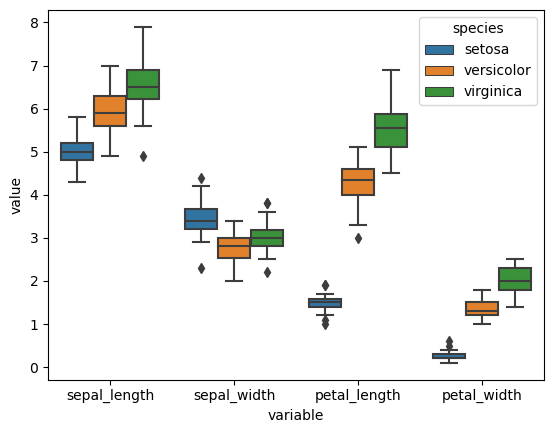

In [20]:
import seaborn as sns
sns.boxplot(x="variable", y="value", hue="species", data=iris_melted)

## Practice exercises

```{exercise}
:label: pandas12

1- Given the following two dataframes, `df_patients` and `df_conditions`, representing patient information and their diagnosed conditions in a hospital setting respectively, do the following:

1.1- Use the join method to add the `df_conditions` dataframe to `df_patients`.
    - See what happens when you use how='inner'. Which patients remain in the final dataframe?
    - See what happens when you use how='outer'. How does the result differ?

1.2- Use the concat function to vertically stack `df_patients` and `df_conditions`. Why concatenating row-wise might not be very useful here?

1.3- Use concat to combine `df_patients` and `df_conditions` column-wise. See if the result looks similar to join. What do you notice about alignment?

```

In [21]:
import pandas as pd

# DataFrame with patient information
data_patients = {
    'patient_id': [201, 202, 203, 204],
    'age': [55, 63, 45, 70],
    'weight': [68.0, 82.3, 74.5, 60.2]
}
df_patients = pd.DataFrame(data_patients)
df_patients.set_index('patient_id', inplace=True)

# DataFrame with medical condition details
data_conditions = {
    'patient_id': [201, 202, 205],
    'condition': ['Hypertension', 'Diabetes', 'Chronic Kidney Disease'],
    'treatment_plan': ['Medication', 'Insulin Therapy', 'Dialysis']
}
df_conditions = pd.DataFrame(data_conditions)
df_conditions.set_index('patient_id', inplace=True)

In [22]:
# Your answers from here

```{exercise}
:label: pandas13

Use a pivot table to compute the following statistics on `sepal_width` and `petal_width` grouped by species:

- median  
- mean
```

In [23]:
# Your answers from here

```{exercise}
:label: pandas14

Given the following dataframe, which contains monthly patient visit counts for different departments, reshape it into a long format using `pd.melt()`, so that each row represents the patient count for a department in a particular month. Set the identifier variable as "Department" and the values column as "Patient_Count." Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to figure out how to do this.
```

In [24]:
# Sample data
data = {
    'Department': ['Cardiology', 'Neurology', 'Oncology'],
    'Jan': [120, 80, 95],
    'Feb': [150, 85, 100],
    'Mar': [130, 90, 110]
}

# Create DataFrame
df = pd.DataFrame(data)
df

Department  Jan  Feb  Mar
0  Cardiology  120  150  130
1   Neurology   80   85   90
2    Oncology   95  100  110

In [25]:
# Your answers from here